In [1]:
# !pip install scikit-multilearn
import pandas as pd
import numpy as np
import math
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from textblob import Word
import re
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from sklearn import preprocessing
from nltk.corpus import stopwords
from nltk.stem import porter
from matplotlib import pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain

     |████████████████████████████████| 92kB 7.5MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              ID  ... trust
0  2017-En-21441  ...     1
1  2017-En-31535  ...     0
2  2017-En-21068  ...     0
3  2017-En-31436  ...     0
4  2017-En-22195  ...     0

[5 rows x 13 columns]
Index(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism',
       'pessimism', 'sadness', 'surprise', 'trust'],
      dtype='object')


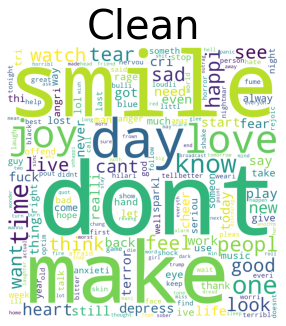

In [2]:
def cleaning(text):
    """
    This function is used to pre process the data for better results. We remove stopwords, punctuation, numbers, URL,
    words with length less than 3 and converted each word to their respective roots.
    :param text: Single tweet
    :return: None
    """
    # print(text)
    stop_words = stopwords.words("english")
    stemming = porter.PorterStemmer()

    text = re.sub(r'\@\w+', '', text)

    text = re.sub(r'[0-9]+', '', text)

    text = text.translate(str.maketrans('', '', string.punctuation))

    # text = re.sub(r'\bhttp\w+', '', text)

    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([stemming.stem(word) for word in text.split()])
    text = ' '.join([word for word in text.split() if len(word) > 2])
    return text


df=pd.read_csv('data.csv',delimiter=',')
clean = []

for index, row in df.iterrows():
  clean.append(cleaning(row['Tweet']))
text = ' '.join([word for word in clean])

del df['Unnamed: 0']
print(df.head())

columns = df.columns[2:]
print(columns)

plt.figure(figsize=(5,5))
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1000,
                          height=1000
                         ).generate(text)

plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)


[2544, 978, 2602, 1242, 2477, 700, 1984, 795, 2008, 361, 357]


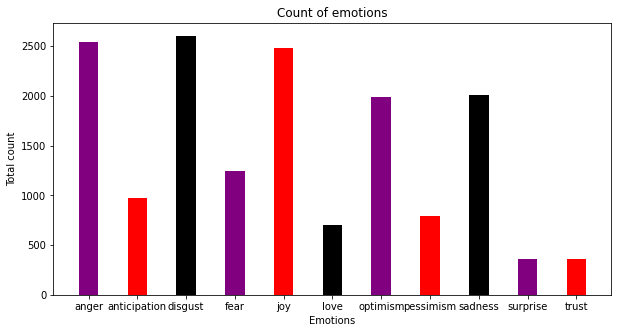

In [3]:
# Finding the distribution of the labels or classes in the dataset.
values = []
for column in columns:
  values.append(len(df[df[column] == 1]))

print(values)

fig = plt.figure(figsize = (10, 5))

plt.bar(columns, values, color = ['purple', 'red', 'black'],  
        width = 0.4) 
  
plt.xlabel("Emotions") 
plt.ylabel("Total count") 
plt.title("Count of emotions") 
plt.show() 

In [4]:
# Baseline Zero Rule classifier
result = 0
for value in df['disgust']:
  if value == 1:
    result += 1
  
print("Accuracy ", result/len(df['disgust']))

Accuracy  0.3805206200643463


In [5]:
df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Removing Punctuation, Symbols
df['Tweet'] = df['Tweet'].str.replace('[^\w\s]',' ')

# Removing Stop Words using NLTK
stop = stopwords.words('english')
df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Lemmatisation
df['Tweet'] = df['Tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

X = df['Tweet']
# print(df[df.columns[3:]])
y = np.asarray(df[df.columns[3:]])

In [6]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30)


# Extracting Count Vectors Parameters
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(df['Tweet'])


In [7]:
# Binary Relevance
X_train = count_vect.transform(X_train)
X_val = count_vect.transform(X_val)

classifier = BinaryRelevance(LogisticRegression())
#Linear SVM
classifier.fit(X_train, y_train)
# predict
predictions = classifier.predict(X_val)
# accuracy
print("Accuracy = ",accuracy_score(y_val,predictions))
print(classification_report(y_val, predictions))

Accuracy =  0.2256335282651072


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.45      0.14      0.22       273\n           1       0.71      0.61      0.65       765\n           2       0.87      0.57      0.69       366\n           3       0.81      0.66      0.72       754\n           4       0.58      0.28      0.38       191\n           5       0.63      0.46      0.53       567\n           6       0.31      0.10      0.15       228\n           7       0.69      0.45      0.54       616\n           8       0.69      0.17      0.27       119\n           9       0.36      0.05      0.09       103\n\n   micro avg       0.70      0.46      0.56      3982\n   macro avg       0.61      0.35      0.42      3982\nweighted avg       0.67      0.46      0.54      3982\n samples avg       0.59      0.49      0.50      3982\n'

In [8]:
# Classifier Chain
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(X_train, y_train)
# predict
predictions = classifier.predict(X_val)
# accuracy
print("Accuracy = ",accuracy_score(y_val,predictions))
classification_report(y_val, predictions)

Accuracy =  0.22807017543859648


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.45      0.14      0.22       273\n           1       0.69      0.62      0.65       765\n           2       0.87      0.57      0.69       366\n           3       0.74      0.73      0.74       754\n           4       0.52      0.34      0.41       191\n           5       0.58      0.58      0.58       567\n           6       0.32      0.13      0.18       228\n           7       0.66      0.44      0.53       616\n           8       0.59      0.16      0.25       119\n           9       0.31      0.08      0.12       103\n\n   micro avg       0.66      0.50      0.57      3982\n   macro avg       0.57      0.38      0.44      3982\nweighted avg       0.64      0.50      0.55      3982\n samples avg       0.60      0.52      0.53      3982\n'

In [2]:
# pip install simpletransformers

     |████████████████████████████████| 225kB 12.8MB/s 
     |████████████████████████████████| 1.4MB 29.3MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 7.4MB 51.5MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 1.8MB 47.4MB/s 
     |████████████████████████████████| 2.9MB 53.0MB/s 
     |████████████████████████████████| 317kB 42.3MB/s 
     |████████████████████████████████| 890kB 57.2MB/s 
     |████████████████████████████████| 4.5MB 48.3MB/s 
     |████████████████████████████████| 163kB 27.1MB/s 
     |████████████████████████████████| 112kB 61.8MB/s 
     |████████████████████████████████| 102kB 3.6MB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
     |████████████████████████████████| 133kB 58.5MB/s 
     |████████████████████████████████| 122kB 59.4MB/s 
     |████████████████████████████████| 71kB 11.7MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp

In [15]:
# Implementing BERT model
from simpletransformers.classification import MultiLabelClassificationModel

df['labels'] = list(zip(df.anger.tolist(), df.anticipation.tolist(), 
                        df.disgust.tolist(), df.fear.tolist(),  df.joy.tolist(),
                        df.love.tolist(), df.optimism.to_list(), 
                        df.pessimism.to_list(), df.sadness.to_list(), 
                        df.surprise.to_list(), df.trust.to_list()))

print(df.head())
new_df = df[['Tweet', 'labels']]
print(new_df.head())

train_df = new_df[:math.floor(0.6*(len(new_df)))]
test_df = new_df[math.floor(0.6*(len(new_df))):math.floor(0.8*(len(new_df)))]
eval_df = new_df[math.floor(0.8*(len(new_df))):]
print(train_df.shape)
print(test_df.head())
print(eval_df.head())

              ID  ...                             labels
0  2017-En-21441  ...  (0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
1  2017-En-31535  ...  (0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0)
2  2017-En-21068  ...  (1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0)
3  2017-En-31436  ...  (0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0)
4  2017-En-22195  ...  (1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)

[5 rows x 14 columns]
                                               Tweet                             labels
0  worry payment problem may never joyce meyer mo...  (0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
1               whatever decide make sure make happy  (0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0)
2  kellerman also help majority nfl coaching inep...  (1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0)
3  accept challenge literally even feel exhilarat...  (0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0)
4  roommate okay spell autocorrect terrible first...  (1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
(4102, 2)
                                                  Tweet                             labels
4102  

In [44]:
# Training of BERT model
model = MultiLabelClassificationModel('bert', 'bert-base-uncased', num_labels=11, args={'reprocess_input_data': True, 'overwrite_output_dir': True, 'num_train_epochs': 1})
model.train_model(train_df)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultiLabelSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultiLabelSequenceClassification were not 

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:387: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(513, 0.4122794124989482)

In [48]:
# Removal of unncecessary columns
eval_df.reset_index(inplace=True)
eval_df.drop(['index','level_0'], inplace=True, axis=1)
eval_df

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Tweet,labels
0,ibiza blue hitting hard already wow,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)"
1,lie cut 5 year age young spry hire able hollyw...,"(0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0)"
2,well stock finished listed living room moved a...,"(0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0)"
3,watch amazing live ly broadcast lively musically,"(0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0)"
4,always start finish,"(0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0)"
...,...,...
1363,hi working towards highlighted concern keep po...,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)"
1364,said play hrc campaigning 4 oh discourage 3rd ...,"(0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0)"
1365,fight guy insult lion like seriously kinda was...,"(1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0)"
1366,wonder guy broke penis sex serious,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)"


In [49]:

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(test_df)
print(result)
print(model_outputs)

predictions, raw_outputs = model.predict(eval_df['Tweet'])
print(predictions)
print(raw_outputs)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:966: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."



{'LRAP': 0.8066349515764724, 'eval_loss': 0.34884203604438846}
[[0.38232422 0.12902832 0.46875    ... 0.43701172 0.04620361 0.04672241]
 [0.56005859 0.11999512 0.56347656 ... 0.29931641 0.04519653 0.02433777]
 [0.14465332 0.13208008 0.16723633 ... 0.66552734 0.05975342 0.05780029]
 ...
 [0.5703125  0.09619141 0.60546875 ... 0.55224609 0.05450439 0.0276947 ]
 [0.25244141 0.11901855 0.29199219 ... 0.74707031 0.06866455 0.04849243]
 [0.08557129 0.19055176 0.08361816 ... 0.10778809 0.08093262 0.10089111]]



[[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0,

In [53]:
# Results of BERT
print(multilabel_confusion_matrix(list(eval_df['labels']), predictions))
classification_report(list(eval_df['labels']), predictions, target_names = columns)

[[[ 767  107]
  [ 130  364]]

 [[1159    0]
  [ 209    0]]

 [[ 720  124]
  [ 163  361]]

 [[1083   13]
  [ 133  139]]

 [[ 814   62]
  [ 136  356]]

 [[1235    0]
  [ 132    1]]

 [[ 836  111]
  [ 188  233]]

 [[1208    0]
  [ 160    0]]

 [[ 894   81]
  [ 218  175]]

 [[1298    0]
  [  70    0]]

 [[1305    0]
  [  63    0]]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n       anger       0.77      0.74      0.75       494\nanticipation       0.00      0.00      0.00       209\n     disgust       0.74      0.69      0.72       524\n        fear       0.91      0.51      0.66       272\n         joy       0.85      0.72      0.78       492\n        love       1.00      0.01      0.01       133\n    optimism       0.68      0.55      0.61       421\n   pessimism       0.00      0.00      0.00       160\n     sadness       0.68      0.45      0.54       393\n    surprise       0.00      0.00      0.00        70\n       trust       0.00      0.00      0.00        63\n\n   micro avg       0.77      0.50      0.61      3231\n   macro avg       0.51      0.33      0.37      3231\nweighted avg       0.66      0.50      0.55      3231\n samples avg       0.66      0.52      0.56      3231\n'